In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier

In [418]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

In [419]:
#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [420]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [421]:
df_x=df["text"]
df_y=df["y"]

In [422]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [423]:
cv = CountVectorizer(min_df = 1, stop_words='english', lowercase='True')
x_traincv=cv.fit_transform(x_train)
x_testcv=cv.transform(x_test)
x_traincv.shape

freqs = zip(cv.get_feature_names(), x_traincv.sum(axis=1))
# sort from largest to smallest
Frequency = sorted(freqs, key=lambda x: -x[1])
for w in Frequency:
    #print(w[0], w[1])
    print('')


c:\Users\liamb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [424]:
'''feature_names = cv.get_feature_names_out()
x_traincv1 = x_traincv
index_of_max = np.where(x_traincv1 == np.amax(x_traincv1))
feature_names[index_of_max]

cv = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
x_traincv=cv.fit_transform(x_train)
x_testcv=cv.transform(x_test)
x_traincv.shape

freqs = zip(cv.get_feature_names(), x_traincv.sum(axis=1))
# sort from largest to smallest
Frequency = sorted(freqs, key=lambda x: -x[1])
for w in Frequency:
    #print(w[0], w[1])
    print('')
'''



"feature_names = cv.get_feature_names_out()\nx_traincv1 = x_traincv\nindex_of_max = np.where(x_traincv1 == np.amax(x_traincv1))\nfeature_names[index_of_max]\n\ncv = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')\nx_traincv=cv.fit_transform(x_train)\nx_testcv=cv.transform(x_test)\nx_traincv.shape\n\nfreqs = zip(cv.get_feature_names(), x_traincv.sum(axis=1))\n# sort from largest to smallest\nFrequency = sorted(freqs, key=lambda x: -x[1])\nfor w in Frequency:\n    #print(w[0], w[1])\n    print('')\n"

In [425]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [426]:
log_reg = LogisticRegression()

In [427]:
log_reg.fit(x_traincv, y_train)

LogisticRegression()

In [428]:
predictions=log_reg.predict(x_testcv)

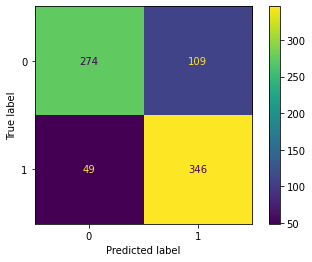

In [429]:
log_reg_cm = confusion_matrix(y_test, predictions, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= log_reg_cm , display_labels=log_reg.classes_)
disp.plot()

In [430]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       383
           1       0.76      0.88      0.81       395

    accuracy                           0.80       778
   macro avg       0.80      0.80      0.80       778
weighted avg       0.80      0.80      0.80       778



In [431]:
log_reg.score(x_testcv, y_test)

0.7969151670951157

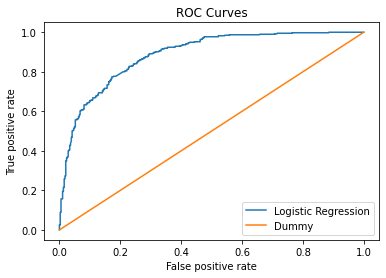

In [432]:
#logistic regression
scores = log_reg.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#dummy
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
scores = dummy.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Logistic Regression', 'Dummy'])
plt.show()

In [433]:
testSentence = ["the earth is flat"]
sentenceTransformed=cv.transform(testSentence)
result = log_reg.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.8922103279698705  chance of being censored.
This tweet has a:  0.10778967203012946  chance of being left uncensored.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


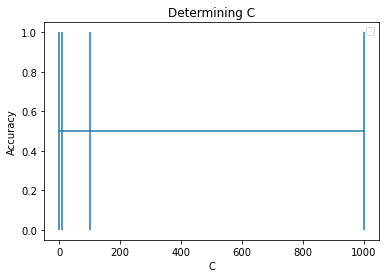

In [434]:

mean_err=[]; std_err=[]
std_err=[]
c_test = [0.001,10,100,1000]

for c in c_test:
    log_reg = LogisticRegression(C=c)
    mean_err.append(np.array(scores).mean())
    std_err.append(np.array(scores).std())

plt.errorbar(c_test, mean_err, yerr=std_err)
plt.xlabel('C'); plt.ylabel('Accuracy')

plt.title('Determining C')
plt.legend()
plt.show()